**Rana Elmaghraby**

## Project Summary

- This project involved a comprehensive analysis of film and celebrity data from two sources:
- Web scraping from IMDb.
- Kaggle dataset
- The initial data was cleaned and pre-processed to correct data types and handle missing values, which were then loaded into a database for further analysis.


In [1]:
import selenium
import pandas as pd

In [2]:
from selenium import webdriver

In [ ]:
driver = webdriver.Chrome()

In [ ]:
driver.get("https://www.imdb.com/chart/starmeter/?ref_=hm_mpc_sm")

Writer , Actor , Producer (Most popular celeb)


In [ ]:
df_celeb = pd.DataFrame()
df_celeb

""


In [ ]:
most_popular_celeb_names = driver.find_elements("xpath",'//div[@class="ipc-title ipc-title--base ipc-title--title ipc-title--title--reduced ipc-title-link-no-icon ipc-title--on-textPrimary sc-d004fd45-2 eVcxaK"]/a/h3')

In [ ]:
most_popular_celeb_names_list = [element.text for element in most_popular_celeb_names]

In [ ]:
df_celeb["Names_Popular_Celebs"] = most_popular_celeb_names_list
df_celeb

,Names_Popular_Celebs
0,Graham Greene
1,Owen Painter
2,Emma Myers
3,Jenna Ortega
4,Evie Templeton
...,...
70,Bruce Willis
71,Christina Ricci
72,Christopher Nolan
73,Adam Sandler


In [ ]:
most_popular_celeb_change = driver.find_elements("xpath",'//span[@class="sc-15fa49cd-0 hgcggx"]')

In [ ]:
most_popular_celeb_change_list = [element.text for element in most_popular_celeb_change]

In [ ]:
df_celeb["ChangesInRank"] = most_popular_celeb_change_list
df_celeb

In [ ]:
df_celeb["Rank"] = list(range(1, 101))

In [ ]:
most_popular_celeb_change = driver.find_elements("xpath",'//span[@class="sc-15fa49cd-0 hgcggx"]')

In [ ]:
most_popular_celeb_change_list = [element.text for element in most_popular_celeb_change]

In [ ]:
df_celeb["ChangesInRank"] = most_popular_celeb_change_list
df_celeb

In [ ]:
most_popular_celeb_role = driver.find_elements("xpath",'//li[@class="ipc-inline-list__item sc-d004fd45-5 ktsYFE"]')

In [ ]:
most_popular_celeb_role_list = [element.text for element in most_popular_celeb_role]

In [ ]:
all_cards = driver.find_elements("xpath",'//div[@class="sc-d004fd45-0 gpTcg"]')

In [ ]:
roles =[]
for role in all_cards:
    try:
        role_elems = role.find_elements("xpath", './/li[@class="ipc-inline-list__item sc-d004fd45-5 ktsYFE"]')
        r_role = ",".join([r.text for r in role_elems ])
    except:
        r_role = None
        
    roles.append(r_role)

df_celeb["Role"] = roles 

In [ ]:
df_celeb

,Names_Popular_Celebs,ChangesInRank,Role
0,Graham Greene,"3,080","Actor,Writer,Producer"
1,Owen Painter,"1,479",Actor
2,Emma Myers,1,Actress
3,Jenna Ortega,4,"Actress,Producer,Soundtrack"
4,Evie Templeton,104,Actor
...,...,...,...
95,Joy Sunday,321,"Actress,Producer,Director"
96,Julie Delpy,86,"Actress,Writer,Producer"
97,Idris Elba,185,"Actor,Producer,Writer"
98,Matthew Goode,17,Actor


In [ ]:
most_popular_celeb_knownfor = driver.find_elements("xpath",'//a[@class="ipc-link ipc-link--base sc-da66c4d2-0 dJdaCn"]')

In [ ]:
most_popular_celeb_knownfor_list = [element.text for element in most_popular_celeb_knownfor]

In [ ]:
title = []
year = []

for text in most_popular_celeb_knownfor_list:
    if "(" in text:  
        title_knownfor = text.split("(")[0].strip()
        year_knownfor  = text.split("(")[1].replace(")", "").strip()
    else:           
        title_knownfor = text.strip()
        year_knownfor  = None

    title.append(title_knownfor)
    year.append(year_knownfor)


df_celeb["KnownFor"] = title
df_celeb["Year_of_MostPopularRole"] = year

In [ ]:
df_celeb

,Names_Popular_Celebs,ChangesInRank,Role,KnownFor,Year_of_MostPopularRole
0,Graham Greene,"3,080","Actor,Writer,Producer",The Green Mile,1999
1,Owen Painter,"1,479",Actor,The Handmaid's Tale,2022–
2,Emma Myers,1,Actress,Wednesday,2022–2026
3,Jenna Ortega,4,"Actress,Producer,Soundtrack",Wednesday,2022–2026
4,Evie Templeton,104,Actor,Pinocchio,2022
...,...,...,...,...,...
95,Joy Sunday,321,"Actress,Producer,Director",Wednesday,2022–2026
96,Julie Delpy,86,"Actress,Writer,Producer",Three Colors: White,1994
97,Idris Elba,185,"Actor,Producer,Writer",Beasts of No Nation,2015
98,Matthew Goode,17,Actor,Stoker,2013


## The data about the most popular 100 celebrities has been collected, including their names, rank changes, roles, and known-for titles, and stored in a DataFrame. Now, let’s perform EDA and data cleaning on it🎬🎞️


---


## EDA


In [ ]:
df_celeb

,Names_Popular_Celebs,ChangesInRank,Role,KnownFor,Year_of_MostPopularRole
0,Graham Greene,"3,080","Actor,Writer,Producer",The Green Mile,1999
1,Owen Painter,"1,479",Actor,The Handmaid's Tale,2022–
2,Emma Myers,1,Actress,Wednesday,2022–2026
3,Jenna Ortega,4,"Actress,Producer,Soundtrack",Wednesday,2022–2026
4,Evie Templeton,104,Actor,Pinocchio,2022
...,...,...,...,...,...
95,Joy Sunday,321,"Actress,Producer,Director",Wednesday,2022–2026
96,Julie Delpy,86,"Actress,Writer,Producer",Three Colors: White,1994
97,Idris Elba,185,"Actor,Producer,Writer",Beasts of No Nation,2015
98,Matthew Goode,17,Actor,Stoker,2013


In [ ]:
df_celeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Names_Popular_Celebs     100 non-null    object
 1   ChangesInRank            100 non-null    object
 2   Role                     100 non-null    object
 3   KnownFor                 100 non-null    object
 4   Year_of_MostPopularRole  99 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [ ]:
df_celeb.describe()

,Names_Popular_Celebs,ChangesInRank,Role,KnownFor,Year_of_MostPopularRole
count,100,100,100,100,99
unique,100,66,39,93,50
top,Graham Greene,6,"Actress,Producer,Soundtrack",Wednesday,2022
freq,1,6,10,4,8


In [ ]:
df_celeb.isna().sum()

Names_Popular_Celebs       0
ChangesInRank              0
Role                       0
KnownFor                   0
Year_of_MostPopularRole    1
dtype: int64

## 💭We have 1 missing value in year col and we should convert dtype of rank,change -->int , year -->date


In [ ]:
df_celeb["Rank"] = df_celeb["Rank"].astype(int)

In [ ]:
df_celeb["ChangesInRank"] = df_celeb["ChangesInRank"].replace("",0)

In [ ]:
df_celeb["ChangesInRank"] = df_celeb["ChangesInRank"].str.replace(",","")

In [ ]:
df_celeb["ChangesInRank"] = df_celeb["ChangesInRank"].astype("Int64").fillna(0)

In [ ]:
from datetime import datetime

In [ ]:
df_celeb["Year_of_MostPopularRole"] = df_celeb["Year_of_MostPopularRole"].astype(str).str[:4]

In [ ]:
df_celeb["Year_of_MostPopularRole"] = pd.to_numeric(df_celeb["Year_of_MostPopularRole"], errors = "coerce").fillna(2025).astype("int64")

In [ ]:
df_celeb["Year_of_MostPopularRole_dt"] = pd.to_datetime(df_celeb["Year_of_MostPopularRole"],format="%Y",errors="coerce" ).fillna(datetime(2025, 1, 1))

In [ ]:
df_celeb

,Names_Popular_Celebs,ChangesInRank,Rank,Role,KnownFor,Year_of_MostPopularRole,Year_of_MostPopularRole_dt
0,Graham Greene,3080,1,"Actor,Writer,Producer",The Green Mile,1999,1999-01-01
1,Owen Painter,1479,2,Actor,The Handmaid's Tale,2022,2022-01-01
2,Emma Myers,1,3,Actress,Wednesday,2022,2022-01-01
3,Jenna Ortega,4,4,"Actress,Producer,Soundtrack",Wednesday,2022,2022-01-01
4,Evie Templeton,104,5,Actor,Pinocchio,2022,2022-01-01
...,...,...,...,...,...,...,...
95,Joy Sunday,321,96,"Actress,Producer,Director",Wednesday,2022,2022-01-01
96,Julie Delpy,86,97,"Actress,Writer,Producer",Three Colors: White,1994,1994-01-01
97,Idris Elba,185,98,"Actor,Producer,Writer",Beasts of No Nation,2015,2015-01-01
98,Matthew Goode,17,99,Actor,Stoker,2013,2013-01-01


In [ ]:
df_celeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Names_Popular_Celebs        100 non-null    object        
 1   ChangesInRank               100 non-null    Int64         
 2   Rank                        100 non-null    int64         
 3   Role                        100 non-null    object        
 4   KnownFor                    100 non-null    object        
 5   Year_of_MostPopularRole     100 non-null    int64         
 6   Year_of_MostPopularRole_dt  100 non-null    datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), int64(2), object(3)
memory usage: 5.7+ KB


In [ ]:
TopCelebs =df_celeb.to_csv("TopCelebs.csv", index=False)

---


In [100]:
import pyodbc
import pandas as pd


conn = pyodbc.connect(
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=LOCALHOST\SQLEXPRESS;"     
    r"DATABASE=imdb;" 
    r"Trusted_Connection=yes"        
)

query = """
SELECT *
FROM TopCelebs
"""

df = pd.read_sql(query, conn)



C:\Users\FreeComp\AppData\Local\Temp\ipykernel_20636\1563832095.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
df

,Names_Popular_Celebs,ChangesInRank,Rank,Role,KnownFor,Year_of_MostPopularRole,Year_of_MostPopularRole_dt
0,Graham Greene,3080,1,"Actor,Writer,Producer",The Green Mile,1999,1999-01-01
1,Owen Painter,1479,2,Actor,The Handmaid's Tale,2022,2022-01-01
2,Emma Myers,1,3,Actress,Wednesday,2022,2022-01-01
3,Jenna Ortega,4,4,"Actress,Producer,Soundtrack",Wednesday,2022,2022-01-01
4,Evie Templeton,104,5,Actor,Pinocchio,2022,2022-01-01
...,...,...,...,...,...,...,...
95,Joy Sunday,321,96,"Actress,Producer,Director",Wednesday,2022,2022-01-01
96,Julie Delpy,86,97,"Actress,Writer,Producer",Three Colors: White,1994,1994-01-01
97,Idris Elba,185,98,"Actor,Producer,Writer",Beasts of No Nation,2015,2015-01-01
98,Matthew Goode,17,99,Actor,Stoker,2013,2013-01-01


## Key Insights


---


In [104]:
import seaborn as sns
from matplotlib import pyplot as plt

In [113]:
query ="""
SELECT Year_of_MostPopularRole, COUNT(*) AS NumTopCelebs
FROM 
TopCelebs
GROUP BY Year_of_MostPopularRole
ORDER BY NumTopCelebs DESC;
"""

df_top_year =pd.read_sql(query, conn)
Top_year_celebs = df_top_year.to_csv("Top_year_celebs.csv",index=False)

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_20636\2421401893.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_year =pd.read_sql(query, conn)


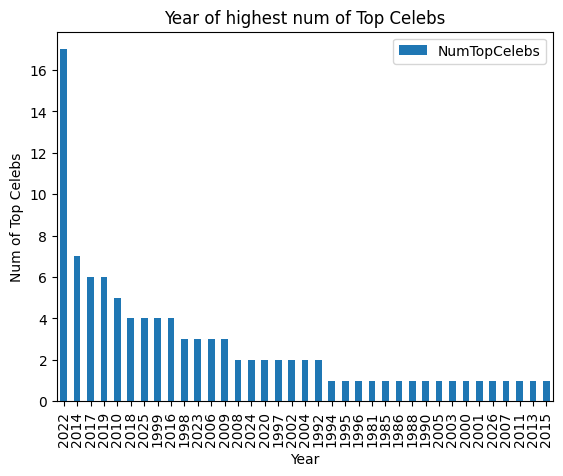

In [ ]:
df_top_year.plot(kind="bar", x="Year_of_MostPopularRole", y="NumTopCelebs", title="Year of highest num of Top Celebs")
plt.xlabel("Year")
plt.ylabel("Num of Top Celebs")
plt.show()

## - Insight:

- The year 2022 recorded the highest number of top celebrities, with 17 entries achieving “Top Celeb” status. This indicates that 2022 was a particularly prolific year in terms of popular roles and notable achievements among celebrities in the dataset.

---


In [ ]:
query ="""
SELECT TOP 5 Names_Popular_Celebs  , Role
FROM
TopCelebs 
WHERE Role LIKE '%Actor%' ;
"""

pd.read_sql(query, conn)


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3228\563381535.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,Names_Popular_Celebs,Role
0,Graham Greene,"Actor,Writer,Producer"
1,Owen Painter,Actor
2,Evie Templeton,Actor
3,Pierce Brosnan,"Actor,Producer,Executive"
4,Lewis Pullman,"Actor,Producer,Soundtrack"


## Top 5 actors


In [ ]:
query ="""
SELECT TOP 5 Names_Popular_Celebs  , Role
FROM
TopCelebs 
WHERE Role LIKE '%Writer%' ;
"""

pd.read_sql(query, conn)

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3228\635309119.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,Names_Popular_Celebs,Role
0,Graham Greene,"Actor,Writer,Producer"
1,Sydney Chandler,"Actress,Writer,Soundtrack"
2,Frances O'Connor,"Actress,Director,Writer"
3,Jacob Elordi,"Actor,Producer,Writer"
4,Domhnall Gleeson,"Actor,Writer,Producer"


## Top 5 Writer


---


In [ ]:
query ="""
SELECT TOP 5 Names_Popular_Celebs  , Role
FROM
TopCelebs 
WHERE Role LIKE '%Producer%' ;
"""

pd.read_sql(query, conn)

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3228\534517257.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,Names_Popular_Celebs,Role
0,Graham Greene,"Actor,Writer,Producer"
1,Jenna Ortega,"Actress,Producer,Soundtrack"
2,Richa Moorjani,"Actress,Producer"
3,Helen Mirren,"Actress,Producer,Director"
4,Pierce Brosnan,"Actor,Producer,Executive"


## Top producer


---


In [ ]:
query ="""
SELECT TOP 5 Names_Popular_Celebs  , Role
FROM
TopCelebs 
WHERE Role LIKE '%Soundtrack%' ;
"""

pd.read_sql(query, conn)

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3228\1304179785.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,Names_Popular_Celebs,Role
0,Jenna Ortega,"Actress,Producer,Soundtrack"
1,Celia Imrie,"Actress,Soundtrack"
2,Sydney Chandler,"Actress,Writer,Soundtrack"
3,Lewis Pullman,"Actor,Producer,Soundtrack"
4,Tom Ellis,"Actor,Producer,Soundtrack"


## Top soundtrack


---


## Most Popular Films


In [ ]:
df_popular_films = pd.DataFrame()

In [ ]:
driver.get("https://www.imdb.com/what-to-watch/popular/?ref_=watch_fanfav_tb")

In [ ]:
mostPopularFilms = driver.find_elements("xpath" , '//div//a[@class="ipc-poster-card__title ipc-poster-card__title--clamp-2 ipc-poster-card__title--clickable"]/span')

In [ ]:
mostPopularFilms_list = [film.text for film in mostPopularFilms]

In [ ]:
df_popular_films["Films_Names"] = mostPopularFilms_list

In [ ]:
numStars = driver.find_elements("xpath" , '//span[@class="ipc-rating-star--rating"]')

In [ ]:
numStars_list = [star.text for star in numStars]

In [ ]:
df_popular_films["Stars"] = numStars_list

In [ ]:
df_popular_films

,Films_Names,Stars
0,Wednesday,8.0
1,Dexter: Resurrection,9.2
2,The Conjuring: Last Rites,6.5
3,The Thursday Murder Club,6.6
4,Highest 2 Lowest,5.7
5,Alien: Earth,7.6
6,The Paper,7.1
7,Weapons,7.7
8,The Terminal List: Dark Wolf,7.9
9,Peacemaker,8.3


In [ ]:
PopularFilms =df_popular_films.to_csv("PopularFilms.csv", index=False)

---


## Top 10 film


In [ ]:

query ="""
SELECT Films_Names , Stars FROM(
SELECT TOP 11 Stars , Films_Names , DENSE_RANK() OVER(ORDER BY Stars) AS TOP_STAR
FROM
PopularFilms
ORDER BY STARS DESC) AS NEW
WHERE TOP_STAR IN (25, 24, 23, 22, 21, 20, 19, 18, 17, 16);
"""

TOP_FILM = pd.read_sql(query, conn)


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3228\1705414702.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TOP_FILM = pd.read_sql(query, conn)


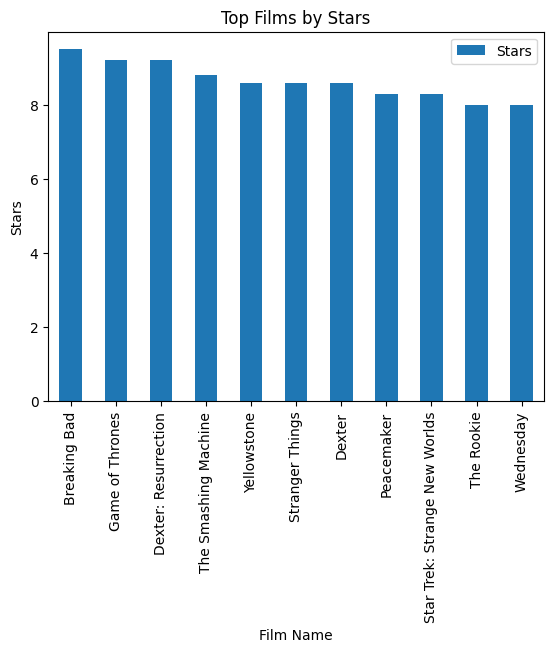

In [ ]:
TOP_FILM.plot(kind="bar", x="Films_Names", y="Stars", title="Top Films by Stars")
plt.xlabel("Film Name")
plt.ylabel("Stars")
plt.show()

## - insight:

- Top 1 --> Breaking Bad
- Top 2 --> Dexter: Resurrection , Game of Thrones
- Top 3 --> The Smashing Machine

---


In [ ]:
query ="""
SELECT Films_Names , Stars FROM(
SELECT TOP 11 Stars , Films_Names , DENSE_RANK() OVER(ORDER BY Stars) AS TOP_STAR
FROM
PopularFilms
ORDER BY STARS DESC) AS NEW
WHERE TOP_STAR IN (25, 24, 23);
"""

TOP3_FILM_POPULAR = pd.read_sql(query, conn)
TOP3_FILM_POPULAR

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3228\560286374.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TOP3_FILM_POPULAR = pd.read_sql(query, conn)


,Films_Names,Stars
0,Breaking Bad,9.5
1,Game of Thrones,9.2
2,Dexter: Resurrection,9.2
3,The Smashing Machine,8.8


In [ ]:
driver.get("https://www.imdb.com/title/tt0903747/?ref_=watch_pop_t_25")

In [ ]:
Breaking_categ = driver.find_elements("xpath" , '//div/a[@class="ipc-chip ipc-chip--on-baseAlt"]/span')

In [ ]:
Breaking_categ_l = " , ".join([cat.text for cat in Breaking_categ])
Breaking_categ_l

'Dark Comedy , Drug Crime , Epic , Psychological Drama , Psychological Thriller , Tragedy , Crime , Drama , Thriller'

In [ ]:
driver.get("https://www.imdb.com/title/tt0944947/?ref_=watch_pop_t_23")

In [ ]:
gameofthrones_categ = driver.find_elements("xpath" , '//div/a[@class="ipc-chip ipc-chip--on-baseAlt"]/span')

In [ ]:
gameofthrones_categ_l = " , ".join([cat.text for cat in gameofthrones_categ])
gameofthrones_categ_l

'Action Epic , Dark Fantasy , Epic , Fantasy Epic , Psychological Drama , Sword & Sorcery , Tragedy , Action , Adventure , Drama'

In [ ]:
driver.get("https://www.imdb.com/title/tt33043892/?ref_=watch_pop_t_2")

In [ ]:
dex_categ = driver.find_elements("xpath" , '//div/a[@class="ipc-chip ipc-chip--on-baseAlt"]/span')

In [ ]:
dex_categ_l = " , ".join([cat.text for cat in dex_categ])
dex_categ_l

'Crime , Drama , Thriller'

In [ ]:
driver.get("https://www.imdb.com/title/tt11214558/?ref_=watch_pop_t_30")

In [ ]:
smashing_categ = driver.find_elements("xpath" , '//div/a[@class="ipc-chip ipc-chip--on-baseAlt"]/span')

In [ ]:
smashing_categ_l = " , ".join([cat.text for cat in smashing_categ])
smashing_categ_l

'Boxing , Docudrama , Action , Biography , Drama , History , Sport'

In [ ]:
TOP3_FILM_POPULAR["Category"] = [smashing_categ_l,dex_categ_l,gameofthrones_categ_l,Breaking_categ_l]
TOP3_FILM_POPULAR

,Films_Names,Stars,Category
0,Breaking Bad,9.5,"Boxing , Docudrama , Action , Biography , Dram..."
1,Game of Thrones,9.2,"Crime , Drama , Thriller"
2,Dexter: Resurrection,9.2,"Action Epic , Dark Fantasy , Epic , Fantasy Ep..."
3,The Smashing Machine,8.8,"Dark Comedy , Drug Crime , Epic , Psychologica..."


In [ ]:
Top3FilmPopular =TOP3_FILM_POPULAR.to_csv("Top3FilmPopular.csv", index=False)

## - insight:

- TOP3_FILM_POPULAR --> Crime , Action , Epic , Drama , Tragedy


---


## Top picks


In [ ]:
df_fan_fav = pd.DataFrame()

In [ ]:
driver.get("https://www.imdb.com/what-to-watch/fan-favorites/?ref_=watch_tpks_tb")

In [ ]:
fan_fav_name = driver.find_elements("xpath" , '//div/a[@class="ipc-poster-card__title ipc-poster-card__title--clamp-2 ipc-poster-card__title--clickable"]/span')

In [ ]:
fan_fav_name_l = [name.text for name in fan_fav_name]
df_fan_fav["Names of Films"] = fan_fav_name_l
df_fan_fav

,Names of Films
0,Weapons
1,Dexter: Resurrection
2,F1: The Movie
3,Superman
4,Thunderbolts*
5,Demon Slayer: Kimetsu no Yaiba - Infinity Castle
6,Mission: Impossible - The Final Reckoning
7,Alien: Earth
8,Wednesday
9,Sinners


In [ ]:
fan_fav_stars = driver.find_elements("xpath" , '//span[@class="ipc-rating-star--rating"]')

In [ ]:
fan_fav_stars_l = [star.text for star in fan_fav_stars]
df_fan_fav["Stars of Films"] = fan_fav_stars_l
df_fan_fav

,Names of Films,Stars of Films
0,Weapons,7.7
1,Dexter: Resurrection,9.2
2,F1: The Movie,7.8
3,Superman,7.2
4,Thunderbolts*,7.2
5,Demon Slayer: Kimetsu no Yaiba - Infinity Castle,8.7
6,Mission: Impossible - The Final Reckoning,7.3
7,Alien: Earth,7.6
8,Wednesday,8.0
9,Sinners,7.6


In [ ]:
df_fan_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Names of Films  48 non-null     object
 1   Stars of Films  48 non-null     object
dtypes: object(2)
memory usage: 900.0+ bytes


In [ ]:
df_fan_fav["Stars of Films"] = df_fan_fav["Stars of Films"].astype("Float64")

In [ ]:
df_fan_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Names of Films  48 non-null     object 
 1   Stars of Films  48 non-null     Float64
dtypes: Float64(1), object(1)
memory usage: 948.0+ bytes


In [ ]:
df_fan_fav

,Names of Films,Stars of Films
0,Weapons,7.7
1,Dexter: Resurrection,9.2
2,F1: The Movie,7.8
3,Superman,7.2
4,Thunderbolts*,7.2
5,Demon Slayer: Kimetsu no Yaiba - Infinity Castle,8.7
6,Mission: Impossible - The Final Reckoning,7.3
7,Alien: Earth,7.6
8,Wednesday,8.0
9,Sinners,7.6


In [ ]:
df_fan_fav= df_fan_fav.sort_values(by="Stars of Films" , ascending =False)
df_fan_fav

,Names of Films,Stars of Films
12,Breaking Bad,9.5
16,The Shawshank Redemption,9.3
20,Game of Thrones,9.2
1,Dexter: Resurrection,9.2
43,The Godfather,9.2
17,The Dark Knight,9.1
32,Better Call Saul,9.0
45,The Lord of the Rings: The Fellowship of the Ring,8.9
19,Fight Club,8.8
23,The Smashing Machine,8.8


In [ ]:
Fan_Favorites = df_fan_fav.to_csv("Fan_Favorites.csv", index=False)
Fan_Favorites

In [ ]:
query = """
SELECT Top 20 *
FROM Fan_Favorites

"""

df5 = pd.read_sql(query, conn)
df5

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8724\2523838069.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query, conn)


,Names_of_Films,Stars_of_Films
0,Breaking Bad,9.5
1,The Shawshank Redemption,9.3
2,Game of Thrones,9.2
3,Dexter: Resurrection,9.2
4,The Godfather,9.2
5,The Dark Knight,9.1
6,Better Call Saul,9.0
7,The Lord of the Rings: The Fellowship of the Ring,8.9
8,Fight Club,8.8
9,The Smashing Machine,8.8


In [ ]:
query =  """
SELECT AVG(Stars_of_Films)
FROM
Fan_Favorites

"""

df6 = pd.read_sql(query, conn)
df6

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8724\3471088622.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query, conn)


,
0,8.18125


## avg of stars in fan favorite -->8,1


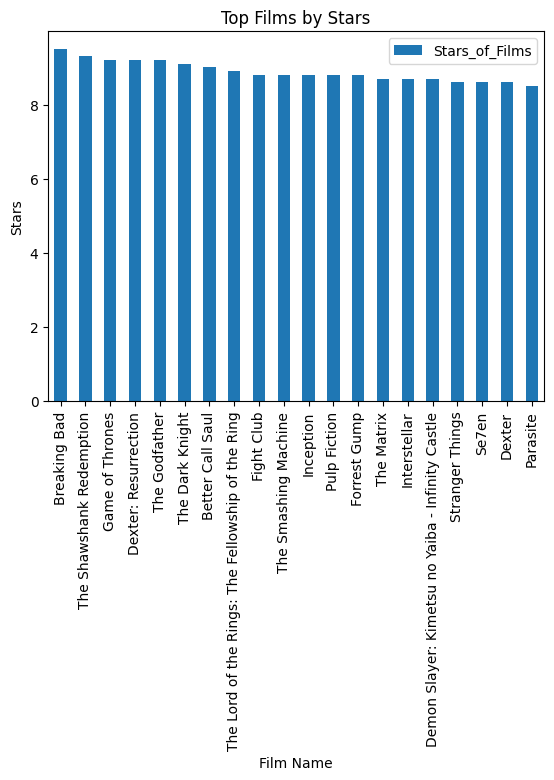

In [ ]:
df5.plot(kind="bar", x="Names_of_Films", y="Stars_of_Films", title="Top Films by Stars")
plt.xlabel("Film Name")
plt.ylabel("Stars")
plt.show()

---


## Dataset From Kaggle


In [ ]:
df_kaggle = pd.read_csv('imdb_top_1000.csv')

In [ ]:
df_kaggle

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


## hmmm🤔


- Runtime --> int
- Released_Year --> date --> year --> int for calculations
- Gross --> float


---


In [ ]:
df_kaggle["Runtime"] = df_kaggle["Runtime"].str.replace("min","")
df_kaggle["Runtime"] = df_kaggle["Runtime"].astype("int64")

In [ ]:
df_kaggle["Released_Year"] = pd.to_numeric(df_kaggle["Released_Year"], errors='coerce')

In [ ]:
df_kaggle['Gross'] = df_kaggle['Gross'].str.replace('$', '', regex=False)
df_kaggle['Gross'] = df_kaggle['Gross'].str.replace(',', '', regex=False)
df_kaggle['Gross'] = pd.to_numeric(df_kaggle['Gross'])

In [ ]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 125.1+ KB


In [ ]:
kaggle_IMDB = df_kaggle.to_csv("kaggle_IMDB.csv" , index= False)

---


## Insights


In [112]:
query =  """
SELECT * FROM TOP_TEN_BY_RATE_META5;
"""
df8 = pd.read_sql(query, conn)
TOP_TEN_IN_RATE_META = df8.to_csv("TOP_TEN_IN_RATE_META.csv" , index= False)
df8

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_20636\3424937895.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df8 = pd.read_sql(query, conn)


,Series_Title,Meta_score,IMDB_Rating
0,Rear Window,100.0,8.4
1,The Godfather,100.0,9.2
2,Casablanca,100.0,8.5
3,City Lights,99.0,8.5
4,Shichinin no samurai,98.0,8.6
5,Dr. Strangelove or: How I Learned to Stop Worr...,97.0,8.4
6,Psycho,97.0,8.5
7,Sen to Chihiro no kamikakushi,96.0,8.6
8,Gisaengchung,96.0,8.6
9,12 Angry Men,96.0,9.0


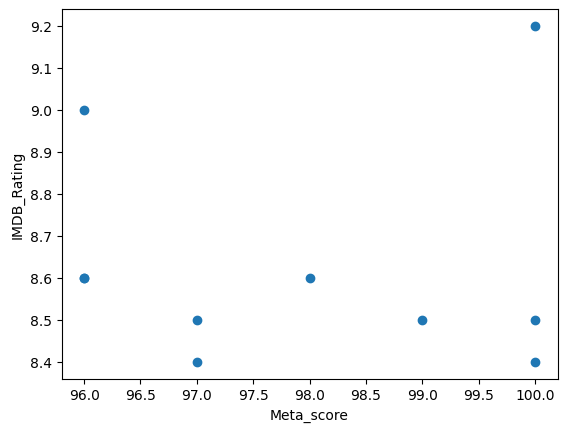

In [110]:
plt.scatter(df8["Meta_score"] , df8["IMDB_Rating"] )
plt.xlabel("Meta_score")
plt.ylabel("IMDB_Rating")
plt.show()

The Godfather --> the best in meta and ranking


---


---


**Rana Elmaghraby**

## Key Findings & Insights

- Using a combination of Python and SQL, a number of key insights were extracted. These findings help to understand what makes a film popular and successful, and they highlight interesting trends in the entertainment industry.

- Top Films & Series: Analysis revealed the top films based on critic (Meta_score) and audience (IMDB_Rating) reception. The project successfully identified a list of the highest-rated films that were popular with both groups. Notably, "The Godfather" was found to be a prime example, achieving a perfect Meta_score of 100 and an exceptional IMDB_Rating of 9.2.

- Celebrity & Crew Analysis: The year 2022 stood out as particularly prolific for celebrities, with 17 individuals achieving "Top Celeb" status. Additionally, the analysis identified the most popular professions (e.g., writer, sound, and actor) within the top-rated films.

- Financial & Popularity Metrics: The average gross earnings for films in the dataset was approximately $68 million. The analysis also identified the top films by genre, sorted by both gross earnings and audience rating, revealing a clear distinction between what is financially successful and what is critically acclaimed.

## Conclusion & Next Steps

- This project successfully demonstrates the entire data pipeline, from raw data acquisition to extracting actionable insights. The results are now stored in a database, providing a solid foundation for future work.

- Potential next steps include building an interactive dashboard to visualize these insights, or performing more advanced analyses like predicting a film's success based on its genre, director, and cast.
